# Scikit-Learn 簡易分類器

In [4]:
from sklearn import datasets
import numpy as np
from IPython.display import Image


iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

print('Class labels:', np.unique(y))

Class labels: [0 1 2]


## 將資料分割成訓練集和測試集

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=1, 
                                                    stratify=y)
#shuffle過
#stratify=y 根據原樣本y的類別比例隨機分配至測試資料

驗證stratify=y

In [6]:
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


## 特徵標準化

運用scikit-learn.preprocessing的StandarScaler進行特徵標準化
* StandardScaler會藉由fit來對全樣本x每個特徵維度估計參數$\mu$(樣本平均數)和$\sigma$(標準差)
* 利用transform對訓練集和測試集使用相同的正規化參數來進行標準化

In [7]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# Perceptron

運用sklearn的Perceptron來分類iris資料

In [8]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(max_iter =40, eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)
y_pred = ppn.predict(X_test_std)
print('分錯個數: %d' % (y_test != y_pred).sum())

分錯個數: 5


### 評估模型

兩種方式觀察模型準確度

In [9]:
from sklearn.metrics import accuracy_score

print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.89


In [10]:
print('Accuracy: %.2f' % ppn.score(X_test_std,y_test))

Accuracy: 0.89


### 繪製決策邊界圖

In [11]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    #限制類別在5個以內
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

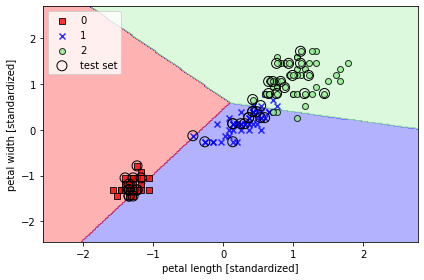

In [12]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=ppn, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('images/03_01.png', dpi=300)
plt.show()

圈起來的的為測試資料集，從圖中可以觀察到線性的感知器很難將iris資料分隔出來

# Logistic regression 
淨輸入值為 -7 ~ 7 來繪製sigmoid函數

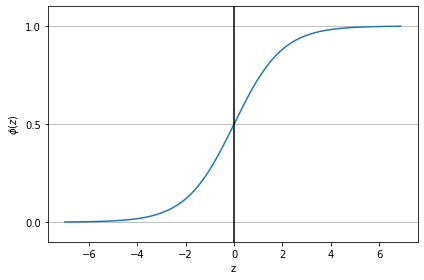

In [13]:
import matplotlib.pyplot as plt
import numpy as np

#logistic函數
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))
#z 淨輸入,為加權和特徵的線性組合
#為了模擬,這裡直接假設
z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)

plt.plot(z, phi_z)
plt.axvline(0.0, color='k') #X軸 0的垂直線
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')

# y axis ticks and gridline
plt.yticks([0.0, 0.5, 1.0]) #Y軸 0 , 0.5 , 1的標籤
ax = plt.gca()
ax.yaxis.grid(True)

plt.tight_layout()
#plt.savefig('images/03_02.png', dpi=300)
plt.show()

下圖說明單一樣本,淨輸入z:-10 ~ 10的成本.
x軸為sigmod(z) y軸為成本

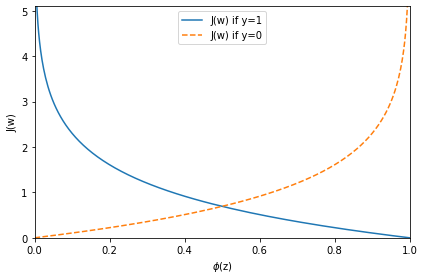

In [14]:
#if y = 1
def cost_1(z):
    return - np.log(sigmoid(z))
#if y = 0
def cost_0(z):
    return - np.log(1 - sigmoid(z))

z = np.arange(-10, 10, 0.1)
phi_z = sigmoid(z)

#y = 1 成本
c1 = [cost_1(x) for x in z]
plt.plot(phi_z, c1, label='J(w) if y=1')
#y = 0 成本
c0 = [cost_0(x) for x in z]
plt.plot(phi_z, c0, linestyle='--', label='J(w) if y=0')

plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
plt.xlabel('$\phi$(z)')
plt.ylabel('J(w)')
plt.legend(loc='best')
plt.tight_layout()
#plt.savefig('images/03_04.png', dpi=300)
plt.show()

自己寫一個Logistic regression

In [15]:
class LogisticRegressionGD(object):
    """Logistic Regression Classifier using gradient descent."""

    
    def __init__(self, eta=0.05, n_iter=100, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data. """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            #一次全樣本
            #不像感知器是逐筆
            #所以權重更新用權重和誤差內積
            net_input = self.net_input(X)
            output = self.activation(net_input) #sigmod
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            
            #計算logistic cost 而不是最小平方
            cost = -y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output)))
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, z):
        """logistic sigmoid activation"""
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

    def predict(self, X):
        """Return class label after unit step"""
        return  np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)
        # equivalent to: np.where(self.net_input(X) >= 0.0, 1, 0)
        # return np.where(self.net_input(X) >= 0.0, 1, 0)

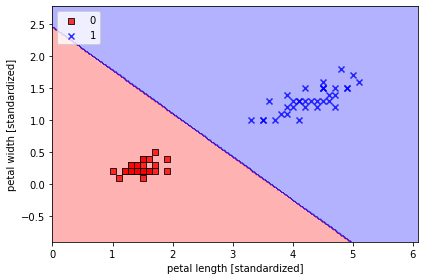

In [16]:
#取出標籤為0和1的資料
X_train_01_subset = X_train[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]

lrgd = LogisticRegressionGD(eta=0.05, n_iter=1000, random_state=1)
lrgd.fit(X_train_01_subset,
         y_train_01_subset)

plot_decision_regions(X=X_train_01_subset, 
                      y=y_train_01_subset,
                      classifier=lrgd)

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('images/03_05.png', dpi=300)
plt.show()

### Logistic regression model with scikit-learn

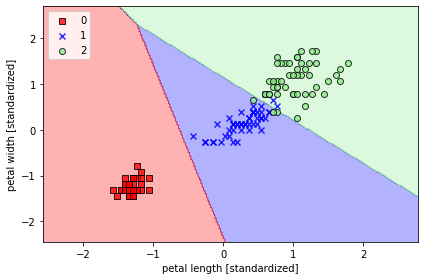

In [17]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=100.0, random_state=1,
                        solver='liblinear',multi_class = 'ovr')
lr.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std,
                      y_combined,
                      classifier=lr)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('images/03_06.png', dpi=300)
plt.show()

前三筆訓練樣本的類別機率

In [18]:
lr.predict_proba(X_test_std[:3, :])

array([[3.22659444e-08, 1.44851276e-01, 8.55148692e-01],
       [8.33994416e-01, 1.66005584e-01, 4.45696994e-12],
       [8.48780305e-01, 1.51219695e-01, 4.52239506e-13]])

取得每列最大值來預測標籤 NumPy.argmax

In [19]:
lr.predict_proba(X_test_std[:3, :]).argmax(axis = 1)

array([2, 0, 0], dtype=int64)

如果要預測單一樣本,sciki-learn需要2d-array 當輸入

In [20]:
lr.predict(X_test_std[0, :].reshape(1, -1))

array([2])

In [21]:
print(X_test_std[0, :].shape)
print(X_test_std[0, :].reshape(1,-1).shape)

(2,)
(1, 2)


# 正規化(Regularization)
variance(變異):測量模型預測能力的一致性,對不同的訓練子集的隨機性效能是否反應良好.  
bias(偏差):測量模型預測正確值的偏離程度,通常是描述非隨機性所產生的系統誤差.

正規化用來調校模型的複雜度,可以處理特徵間共線性的問題,當加入過多的特徵(產生偏誤),正規化會懲罰極端的參數權重來過濾數據中的雜訊以達到防止Overfitting.

## 正規化處理over-fitting

C:反正規化參數(正規化參數的倒數)
下圖呈現不同的C權重係數的變化,如果將C變小正規化參數就會變大,權重係數就會收縮.

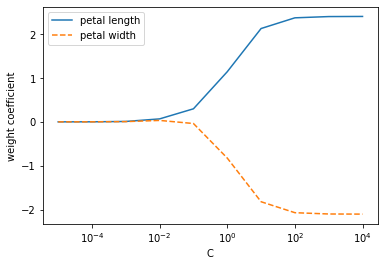

In [22]:
weights, params = [], []
for c in np.arange(-5, 5):
    lr = LogisticRegression(C=10.**c, random_state=1,solver='liblinear',multi_class = 'ovr')
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)

weights = np.array(weights)
plt.plot(params, weights[:, 0],
         label='petal length')
plt.plot(params, weights[:, 1], linestyle='--',
         label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
#plt.savefig('images/03_08.png', dpi=300)
plt.show()

# SVM (支援向量機)

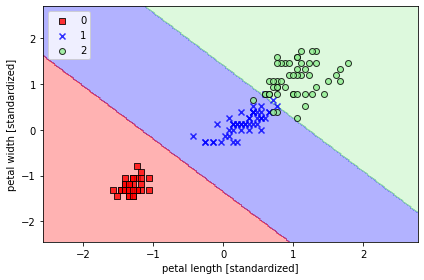

In [23]:
from sklearn.svm import SVC

svm = SVC(kernel = 'linear',C = 1.0, random_state = 1)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, 
                      y_combined,
                      classifier=svm)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [24]:
from sklearn.metrics import accuracy_score

y_pred = svm.predict(X_test_std)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.98


# 其他簡單演算法

In [25]:
#from sklearn.linear_model import SGDClassifier
#感知器
#ppn = SGDClassifier(loss='perceptron', n_iter=1000)
#邏輯式迴歸
#lr = SGDClassifier(loss='log', n_iter=1000)
#線性支援向量機
#svm = SGDClassifier(loss='hinge', n_iter=1000)

### Kernal classify 
使用核心支持向量機解決非線性問題.
利用numpy的logical_xor產生數據.

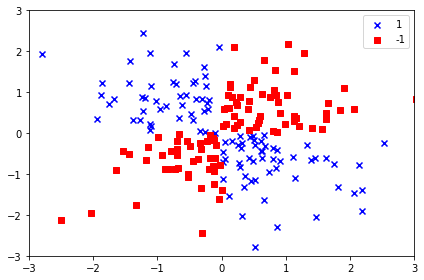

In [26]:
import matplotlib.pyplot as plt
import numpy as np
#xor 邏輯互斥 TT = F,FF = F,TF = T, FT = T
np.random.seed(1)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0,
                       X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

plt.scatter(X_xor[y_xor == 1, 0],
            X_xor[y_xor == 1, 1],
            c='b', marker='x',
            label='1')
plt.scatter(X_xor[y_xor == -1, 0],
            X_xor[y_xor == -1, 1],
            c='r',
            marker='s',
            label='-1')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.tight_layout()
#plt.savefig('images/03_12.png', dpi=300)
plt.show()

上圖的樣本無法被線性模型給分類。核支援向量機基本處理想法是將低維樣本空間藉由對應函數投影到更高維的空間中，其中這個高維空間是可以被線性分離。如下圖將二維非線性空間投影到三維空間使其變成可線性分離。

(x1,x2) => (z1,z2,z3) = (x1,x2,x1^2 + x2^2)
<img src="image/01.png" width="700">

將原本參數kernel='linear'改成'rbf',然後試跑結果.

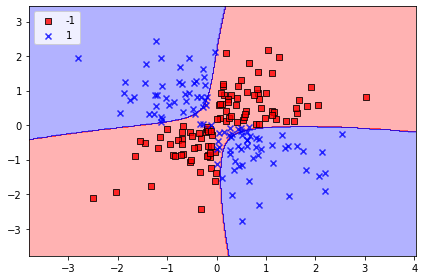

In [27]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor,
                      classifier=svm)

plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('images/03_14.png', dpi=300)
plt.show()

## gamma
$K(x_i,x_j) = exp(-γ||x_i - x_j||^2),γ>0$  
$γ = \frac{1}{2σ^2}$  
$gamma = γ$
如果gamma設的太大，σ會很小，σ很小的高斯分佈長得又高又瘦，會造成只會作用於支持向量樣本附近，對於未知樣本分類效果很差，存在訓練準確率可以很高，(如果讓σ無窮小，則理論上，高斯核的SVM可以擬合任何非線性數據，但容易過擬合)而測試準確率不高的可能，就是通常說的Overfitting；而如果設的過小，則會造成平滑效應太大，無法在訓練集上得到特別高的準確率，也會影響測試集的準確率。  
也就是說:  
* gamma大，資料點的影響力範圍比較近，對超平面來說，近點的影響力權重較大，容易勾勒出擬合近點的超平面，也容易造成overfitting。  

* gamma小，資料點的影響力範圍比較遠，對超平面來說，較遠的資料點也有影響力，因此能勾勒出平滑、近似直線的超平面。



### 運用RBF核支援向量機到iris data來理解gamma參數的影響
gamma = 0.2

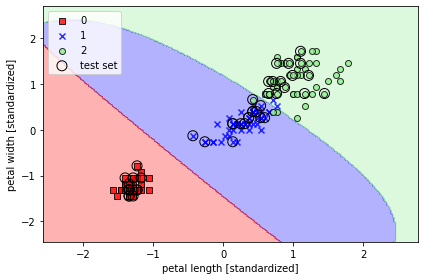

In [28]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('images/03_15.png', dpi=300)
plt.show()

gamma = 50

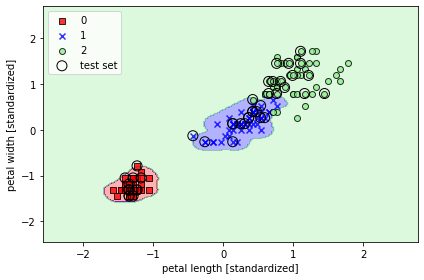

In [29]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', random_state=1, gamma=50, C=1.0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('images/03_15.png', dpi=300)
plt.show()

### 決策樹


### 不純度
針對三個不純度視覺化之比較(熵,Gini,分類錯誤率)

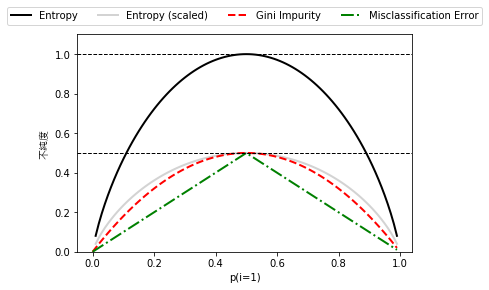

In [30]:
import matplotlib.pyplot as plt
import numpy as np


def gini(p):
    return p * (1 - p) + (1 - p) * (1 - (1 - p))


def entropy(p):
    return - p * np.log2(p) - (1 - p) * np.log2((1 - p))


def error(p):
    return 1 - np.max([p, 1 - p])

x = np.arange(0.0, 1.0, 0.01)

ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e * 0.5 if e else None for e in ent]
err = [error(i) for i in x]

fig = plt.figure()
ax = plt.subplot(111)
for i, lab, ls, c, in zip([ent, sc_ent, gini(x), err], 
                          ['Entropy', 'Entropy (scaled)', 
                           'Gini Impurity', 'Misclassification Error'],
                          ['-', '-', '--', '-.'],
                          ['black', 'lightgray', 'red', 'green', 'cyan']):
    line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
          ncol=5, fancybox=True, shadow=False)

ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('不純度', fontproperties= 'Microsoft JhengHei')
#plt.savefig('images/03_19.png', dpi=300, bbox_inches='tight')
plt.show()

熵:不純度反應彈性大,算法耗時,特徵多時能很好且有效衡量分類  
Gini:不純度反應彈性中等近似一半的熵,算法不耗時,特徵太多時會無法有效衡量分類                           
分類錯誤率:不純度反應彈性低,且呈現線性,有時候節點分裂會無法降低不純度

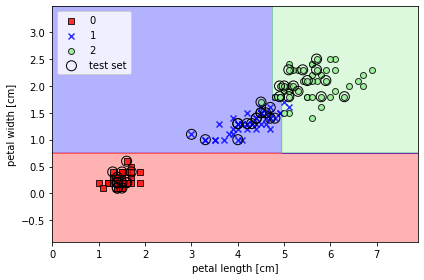

In [31]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='gini', 
                              max_depth=4, 
                              random_state=1)
tree.fit(X_train, y_train)

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, 
                      classifier=tree, test_idx=range(105, 150))

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('images/03_20.png', dpi=300)
plt.show()

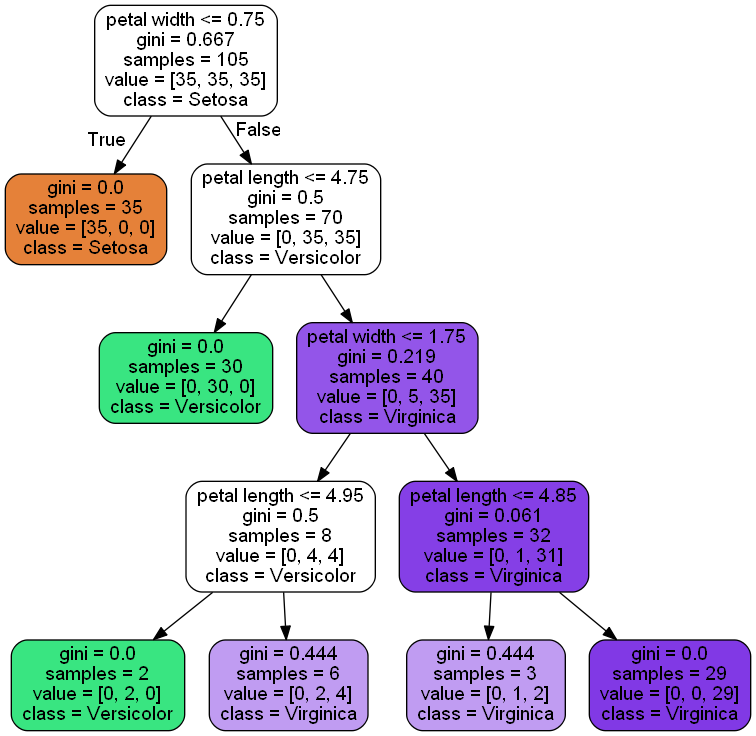

In [32]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

dot_data = export_graphviz(tree,
                           filled=True, 
                           rounded=True,
                           class_names=['Setosa', 
                                        'Versicolor',
                                        'Virginica'],
                           feature_names=['petal length', 
                                          'petal width'],
                           out_file=None) 
graph = graph_from_dot_data(dot_data) 
Image(graph.create_png())
#graph.write_png('image/tree.png') 

修剪決策樹的深度(max_depth)為3

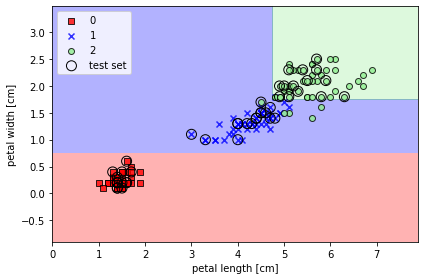

In [33]:

tree2 = DecisionTreeClassifier(criterion='gini', 
                              max_depth=3, 
                              random_state=1)
tree2.fit(X_train, y_train)
plot_decision_regions(X_combined, y_combined, 
                      classifier=tree2, test_idx=range(105, 150))

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('images/03_20.png', dpi=300)
plt.show()


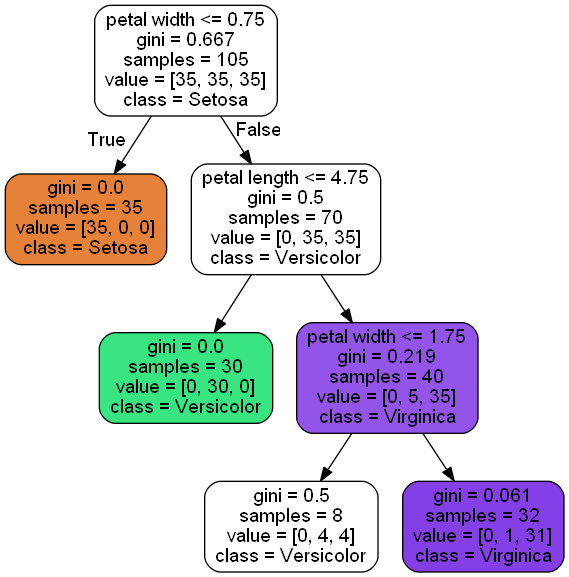

In [34]:
dot_data2 = export_graphviz(tree2,
                            filled=True, 
                            rounded=True,
                            class_names=['Setosa', 
                                         'Versicolor',
                                         'Virginica'],
                            feature_names=['petal length', 
                                           'petal width'],
                            out_file=None) 
graph2 = graph_from_dot_data(dot_data2) 
Image(graph2.create_png())
#graph.write_png('image/tree.png')

樹搜索到第三階就停止了,即便第四層還能再往下繼續分,但是這樣就容易記住樣本而產生overfitting

### 隨機森林
1. 定義大小為n的隨機bootsrap樣本(抽取為n取出放回)
2. 從樣本建立決策樹,隨機選取d個特徵,並根據d個特徵找尋最佳劃分
3. 重複k次1~2
4. 彙總全部決策樹的預測以投票的方式來指定類別標籤

* 可以匯集計算預測效果好的決策樹所使用的的特徵,來排序特徵的重要性.
* 樹的數量k越多,隨機森林性能越好,但是計算成本會增加很多.
* 每棵樹的樣本數n太小會導致整體森林效能變差,但是可以增加隨機性.
 - 樣本數n太多可能會增加overfitting,但是學習出的模型會比較接近原始數據.
 - scikit-learn.RandomForestClassifier() n預設為原始數據集的大小.  

* 超參數bootsrap的n & 隨機選取的d,太低增加單一樹的多樣性與隨機性可以降低overfitting,但是整體森林的性能可能會變差導致訓練集與測試集差異不高;太高就容易overfitting,樹跟樹之間相似程度提高,整體森林會接近原始數據.

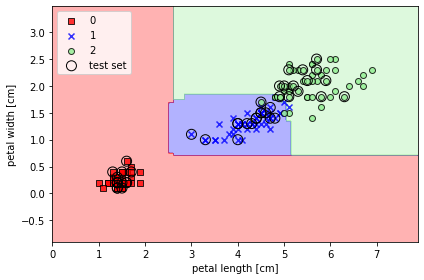

In [35]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='entropy',
                                n_estimators=50, #樹的數量
                                random_state=1,
                                max_depth = 3,
                                n_jobs=2) #使用電腦的幾個核心
forest.fit(X_train, y_train)

plot_decision_regions(X_combined, y_combined, 
                      classifier=forest, test_idx=range(105, 150))

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('images/03_22.png', dpi=300)
plt.show()

### KNN
1. 選定一個K值和距離函數(distance function)
2. 找出k個要分類的鄰近樣本
3. 多數決方式決定類別標籤


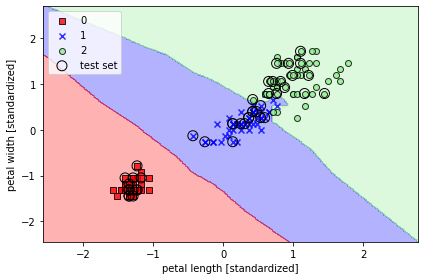

In [36]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3,  #k
                           p=2, #距離函數 2 = 歐式距離 1 = 曼哈頓距離....
                           metric='minkowski')
knn.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, 
                      classifier=knn, test_idx=range(105, 150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('images/03_24.png', dpi=300)
plt.show()